# # In-class exercises Class 18


---
Today, we will learn tools to test the quality of our fit and to visualize it. 





First, let's import the tools that we will need:

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import math


## Fitting With Error Bars

Let's start by making a simple dataset.  We will use the example we have used in class of an object falling like last time, but this time we will add 20% error bars to match our 20% random smearing of the velocities.    


Text(0, 0.5, 'v (m/s)')

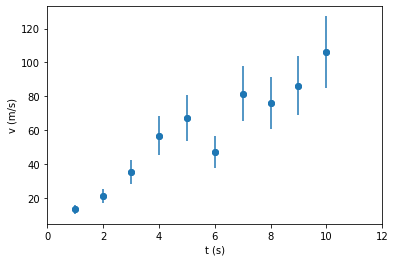

In [2]:
# Seed the random number generator for reproducibility
np.random.seed(0)

A_grav=9.8

x_data = np.linspace(1, 10, num=10)

#Here we are smearing our values with Gaussian random number y(1+-.2)
y_data = A_grav*x_data*(1+np.random.normal(size=10)/5.0) 
y_error=0.20*y_data

#y_error=.2*A_grav*x_data

# And plot it
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.errorbar(x_data,y_data,y_error,fmt="o")
plt.xlim(xmax = 12.0, xmin = 0)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
# Seed the random number generator for reproducibility




Again, this is a similar dataset to the example one in class:  dropping an object.   Let's see how we could fit it to a line and extract the best fit parameters.  For fitting in this class, we will start with the "optimize" method from the scipy.

First, we also need to define our function.  Our data looks linear (y=ax+b), so let's try that first and see what we get.  Let's fix the y-intercept to zero.  So, our function is y=ax.  

In [3]:
def test_func(x, a):
    return a*x 

Here is the basic use of the "optimize" function with error bars on the y_data:

In [4]:
params, params_covariance = scipy.optimize.curve_fit(test_func, x_data, y_data,sigma=y_error,
                                               p0=[10])

#print(params)
print('y = %.5f * x ' % (params[0]))
#print(params_covariance)

y = 10.57568 * x 


Since we used error bars, our uncertainty on the fit parameters means something.  **The square root of the diaganol elements of the covariance matrix provides the uncertainty on the extracted fit parameter**.  Lets check it:

In [5]:
par_sigma=math.sqrt(params_covariance[0,0])
print(f'slope={params[0]:4.2f} +- {par_sigma:4.2f}')

print(f'this is {(params[0]-A_grav)/par_sigma:4.2f} sigma away from the true value of {A_grav}.')


slope=10.58 +- 0.63
this is 1.23 sigma away from the true value of 9.8.


## **EXERCISE 1**:  
<span style="color:red"> We drew random numbers, so there will be some fluctuation from the true value when we do our fit (our data has statistical variations).  We got a 1.23 sigma deviation. Even if this is the correct model (it is), how likely would it produce a result 1.23 sigma or larger away from the true value? </red>

In [6]:
#Put your code calculation and/or text answer here

Great, we got the best-fit parameter AND ITS UNCERTAINTY from the fit and wrote them to the screen.  Let's plot the resulting best fit line on the data and see how it looks.

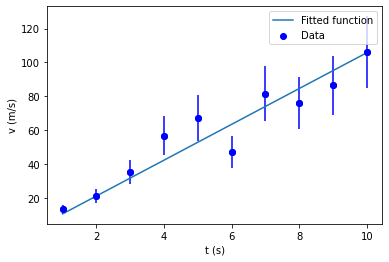

In [13]:
plt.figure(figsize=(6, 4))

#Here we are plotting our data
plt.scatter(x_data, y_data, label='Data',color='blue')

#Here we are plotting out fit function with the extracted best-fit parameter
plt.plot(x_data, test_func(x_data, params[0]),
         label='Fitted function')

#Make it pretty :-) 
plt.errorbar(x_data,y_data,y_error,fmt="o",color='blue')
plt.legend(loc='best')
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.show()

This looks pretty good to me by eye:  most data points are within 1-sigma of the model.  However, **I'd like a quantitative number for the quality of the fit**.  For that, we can calculate the Chi^2!  Let's write a short function to do this:

In [14]:

def chisq(x,obs, exp, error):
    #Remember with Python it is better to use numpy array operations than loops if you can
    return np.sum((obs - exp) ** 2 / (error ** 2))

chi2=chisq(x_data, y_data,test_func(x_data, params[0]), y_error)

print(f"The Chi^2={chi2:5.2f}, and with N_DOF=10-1 the reduced Chi^2={chi2/9.0:4.2f}")

The Chi^2= 7.74, and with N_DOF=10-1 the reduced Chi^2=0.86


We got a reduced chi-squared value of near 1, so our fit to the data is very reasonable.  

## **EXERCISE 2**:  
<span style="color:red"> Reduce the size of the error by a factor of 2.  What happens to the fit?  What happens to the Chi^2.  You can duplicate the code here, or just make the modifications to the code above and explain what happens.   </red>

In [15]:
#Put your code or text answer here

## Residuals and pull distributions.  

Let's use our example above, but now take data for the first 1000 seconds  (k=1000).

y = 9.69776 * x 
slope=9.70 +- 0.06
this is -1.68 sigma away from the true value of 9.8.


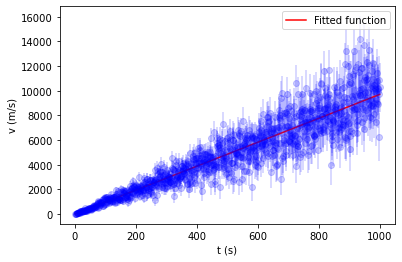

In [16]:
x_data = np.linspace(1, 1000, num=1000)


y_data = A_grav*x_data*(np.random.normal(loc=1,scale=.2,size=1000))

#Here we are smearing our values with Uniform random number y(1+-.2)
#y_data = 9.8*x_data*(np.random.uniform(.8,1.2,size=1000)/5.0) 


#y_error=0.20*y_data

y_error=0.20*A_grav*x_data

params, params_covariance = scipy.optimize.curve_fit(test_func, x_data, y_data,sigma=y_error,
                                               p0=[10])




print('y = %.5f * x ' % (params[0]))

par_sigma=math.sqrt(params_covariance[0,0])
print(f'slope={params[0]:4.2f} +- {par_sigma:4.2f}')

print(f'this is {(params[0]-A_grav)/par_sigma:4.2f} sigma away from the true value of {A_grav}.')


plt.errorbar(x_data,y_data,y_error,fmt="o",color='blue',alpha=.2)
plt.plot(x_data, test_func(x_data, params[0]),
         label='Fitted function',color='red')

plt.legend(loc='best')
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.show()

Does this look OK?   Perhaps we can check the residuals and get a clue.  That is, we want to look at (data-fit)/sigma for each point used in the fit.  So, we are just looking at how far off the model is for each data point in units of sigma.

Text(0.5, 0, 't (s)')

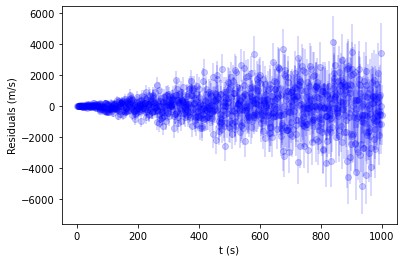

In [17]:
my_res=(test_func(x_data, params[0])-y_data)

plt.errorbar(x_data,my_res,y_error,fmt="o",color='blue',alpha=.2)
plt.ylabel("Residuals (m/s)")
plt.xlabel("t (s)")

We could also plot it in units of sigma:

Text(0.5, 0, 't (s)')

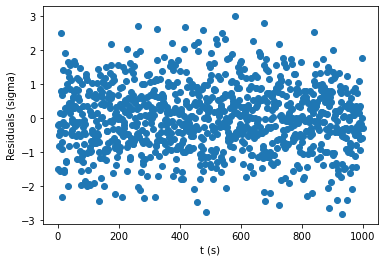

In [18]:
my_res_sigma=(test_func(x_data, params[0])-y_data)/y_error
plt.scatter(x_data,my_res_sigma)
plt.ylabel("Residuals (sigma)")
plt.xlabel("t (s)")

This looks pretty reasonable!  Remember, ~1/3 of the points should be outside of the region between -1 and 1.   If we plot a histograms of the residuals it is easier to see the trends.  **This is called the pull distribution**.  If the error bars are perfect this would be a unit Gaussian with a mean of zero and a sigma of one.  

Text(0, 0.5, 'Count/bin')

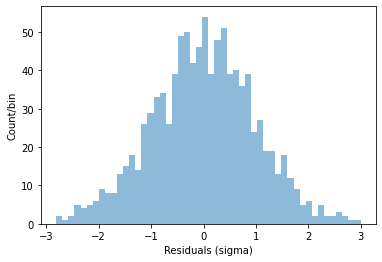

In [19]:
bin_values_data, bins, myart = plt.hist(my_res_sigma, 50, alpha=0.5) 
plt.xlabel("Residuals (sigma)")
plt.ylabel("Count/bin")

This should looks Gaussian, let's fit it, to find out how Gaussian it is!  I know, this is pretty deep right, fits of fits of fits (or something like that).  

In [20]:
mu, sigma = scipy.stats.norm.fit(my_res_sigma)

print(f"\n\n The best fit parameters are:  mu={mu:4.2f}  sigma={sigma:4.2f} \n\n")



 The best fit parameters are:  mu=-0.00  sigma=0.98 




So, our residual plot looks almost perfect!  We would need to extract the uncertainty on the parameters from the covariance matrix to test if .98 is consistent with 1, but we can't do that with 'scipy.stats.norm.fit'.  We will learn how to do that for fitting with a Gaussian next time...  But, from what we can tell right now, our **pull** distribution seems right on!  

## **EXERCISE 3**:  
<span style="color:red"> In your own words, explain what the Pull Distribution is, what it means, and why it is useful.   </red>

Put your answer here.  